In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/lilexin/Desktop/Project 2/project2 raw data/adoNY_c_f.csv')

In [3]:
df.head(5)

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,DadRace,Transracial
0,10115515140,2,2,0,1,20.0,1.0,33.0,33.0,1.0,1,1,0
1,10185923110,1,2,1,2,29.0,2.0,45.0,54.0,1.0,1,1,1
2,10199738080,2,2,0,1,24.0,2.0,36.0,45.0,1.0,1,1,0
3,10206906020,2,2,0,99,28.0,2.0,41.0,44.0,1.0,1,1,9
4,10286352150,1,2,1,99,36.0,2.0,32.0,32.0,1.0,1,1,9


1. RECNUM: record number
2. SEX: child sex 1-male 2-female
3. AGYSPNDS: child special needs, 0-not applicable, 1-yes, 2-no, 3-unable to determin
4. AgeAtAdopt: child’s age on date of adoption
5. ChildRace: race of child as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
6. BioMomAgeAtBirth: biological mother’s age on date of child’s birth
7. MOMARRD: biological mother married, 0-not applicable, 1-yes, 2-no, 3-unable to determine
8. AdoptMomAge: adoptive mother’s age on date of adoption
9. AdoptDadAge: adoptive father’s age on date of adoption
10. ADPFAMST: adoptive family structure, 0-not applicable, 1-married couple, 2-unmarried couple, 3-single female, 4-single male, 5-unable to determine
11. MomRace: race of adoptive mother as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
12. DadRace: race of adoptive father as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
13. Transracial: transracial adoption, 0-not transracial, 1-child not White + parent White, 2-child White + parent not White, 3-other transracial, 9-insufficient race info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 13 columns):
RECNUM              1933 non-null int64
SEX                 1933 non-null int64
AGYSPNDS            1933 non-null int64
AgeAtAdopt          1933 non-null int64
ChildRace           1933 non-null int64
BioMomAgeAtBirth    1903 non-null float64
MOMARRD             1890 non-null float64
AdoptMomAge         1890 non-null float64
AdoptDadAge         946 non-null float64
ADPFAMST            1890 non-null float64
MomRace             1933 non-null int64
DadRace             1933 non-null int64
Transracial         1933 non-null int64
dtypes: float64(5), int64(8)
memory usage: 196.4 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
def drop_99(x):
    if x==99:
        x=np.nan
    
    else:
        x=x
    return x
    

df['ChildRace']=df['ChildRace'].apply(lambda x: drop_99(x))
df['MomRace']=df['MomRace'].apply(lambda x: drop_99(x))
df['DadRace']=df['DadRace'].apply(lambda x: drop_99(x))

In [7]:
def data_glimps(Variable,color,kind):
    fig = plt.figure(figsize=(8,3))
    ax = fig.gca()
    df.groupby([Variable]).size().plot(kind=kind,ax=ax,color=color)
    plt.show()
    

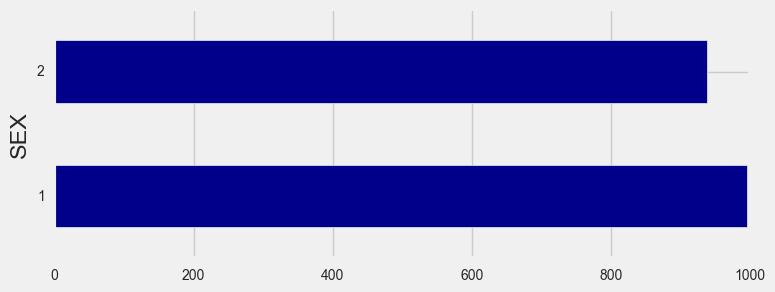

In [8]:
data_glimps('SEX','darkblue','Barh')

In [9]:
df['SEX']=df['SEX'].apply(lambda x: 1 if x==1 else 0)

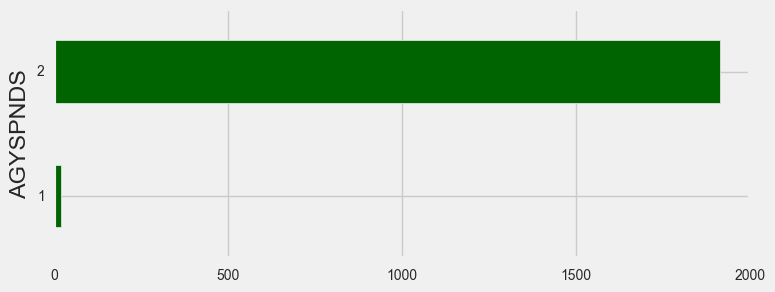

In [10]:
data_glimps('AGYSPNDS','darkgreen','barh')
#acording to the index  and info above, this variable have no missing obs, so we can turn it into a dummy variable

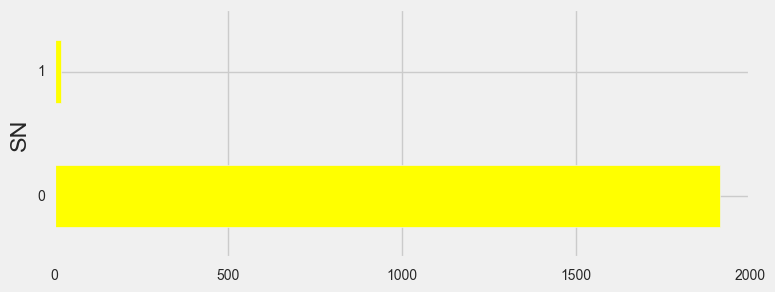

,RECNUM,SEX,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,DadRace,Transracial,SN
0,10115515140,0,0,1.0,20.0,1.0,33.0,33.0,1.0,1.0,1.0,0,0
1,10185923110,1,1,2.0,29.0,2.0,45.0,54.0,1.0,1.0,1.0,1,0
2,10199738080,0,0,1.0,24.0,2.0,36.0,45.0,1.0,1.0,1.0,0,0
3,10206906020,0,0,NaN,28.0,2.0,41.0,44.0,1.0,1.0,1.0,9,0
4,10286352150,1,1,NaN,36.0,2.0,32.0,32.0,1.0,1.0,1.0,9,0
5,10291477140,0,0,NaN,23.0,2.0,43.0,39.0,1.0,1.0,1.0,9,0
6,10291478120,1,0,NaN,23.0,2.0,43.0,39.0,1.0,1.0,1.0,9,0
7,10302822130,1,0,1.0,24.0,2.0,60.0,65.0,1.0,1.0,1.0,0,0
8,10330723240,1,0,NaN,22.0,2.0,50.0,52.0,1.0,1.0,1.0,9,0
9,10614847090,0,0,1.0,28.0,2.0,47.0,42.0,1.0,1.0,1.0,0,0


In [11]:
df['SN']=(df['AGYSPNDS']%2)
data_glimps('SN','yellow','barh')
df.drop(['AGYSPNDS'],axis=1)

Finish the cleaning of SN

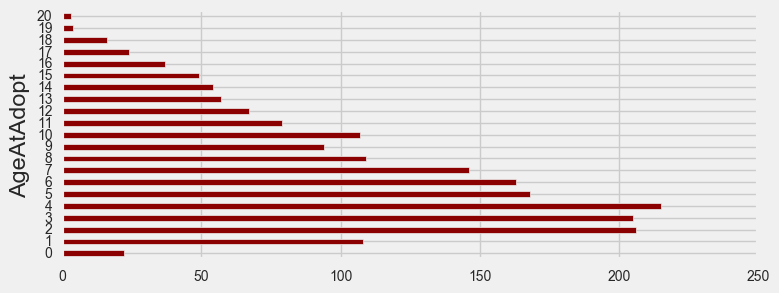

In [12]:
data_glimps('AgeAtAdopt','darkred','barh')

In [13]:
age=df['AgeAtAdopt']
df['std_age_at_adopt']=(age-np.mean(age))/np.std(age)


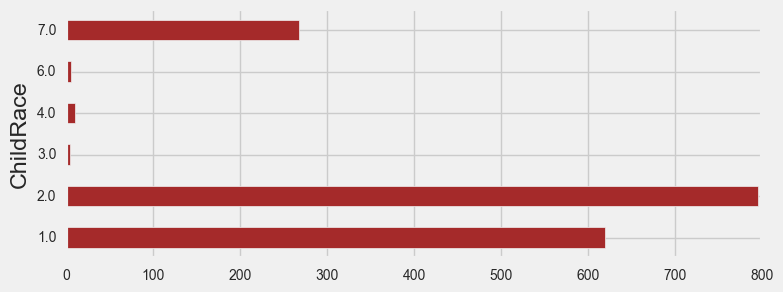

In [14]:
data_glimps('ChildRace','brown','barh')

Two steps to clean this variabl:1.separate it into 6 dummies.
                                2.translate '99' into Nan

In [15]:
df['white']=df['ChildRace']
df['black']=df['ChildRace']
df['amid']=df['ChildRace']
df['asian']=df['ChildRace']
df['hawaii']=df['ChildRace']
df['mixed']=df['ChildRace']
df['hispanic']=df['ChildRace']



In [16]:
def get_white_dummy(x):
    if x==1:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['white']=df['white'].apply(lambda x: get_white_dummy(x))

def get_black_dummy(x):
    if x==2:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['black']=df['black'].apply(lambda x: get_black_dummy(x))

def get_amid_dummy(x):
    if x==3:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['amid']=df['amid'].apply(lambda x: get_amid_dummy(x))

def get_asian_dummy(x):
    if x==4:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['asian']=df['asian'].apply(lambda x: get_asian_dummy(x))

def get_hawaii_dummy(x):
    if x==5:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['hawaii']=df['hawaii'].apply(lambda x: get_hawaii_dummy(x))

def get_mixed_dummy(x):
    if x==6:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['mixed']=df['mixed'].apply(lambda x: get_mixed_dummy(x))

def get_hispanic_dummy(x):
    if x==7:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['hispanic']=df['hispanic'].apply(lambda x: get_hispanic_dummy(x))

In [17]:
df.tail()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,Transracial,SN,std_age_at_adopt,white,black,amid,asian,hawaii,mixed,hispanic
1928,262695000000,1,2,7,2.0,39.0,2.0,65.0,NaN,3.0,...,0,0,0.068809,0,1,0,0,0,0,0
1929,262696000000,0,2,7,2.0,40.0,2.0,38.0,46.0,1.0,...,3,0,0.068809,0,1,0,0,0,0,0
1930,262696000000,0,2,8,NaN,39.0,2.0,38.0,46.0,1.0,...,9,0,0.298530,0,0,0,0,0,0,0
1931,262699000000,0,2,7,7.0,37.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1
1932,262699000000,1,2,7,7.0,38.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1


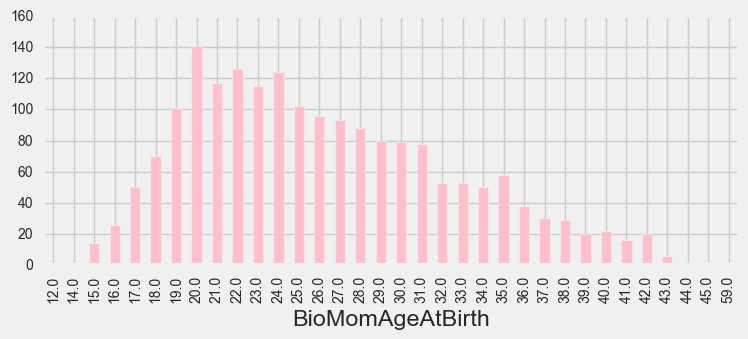

In [18]:
data_glimps('BioMomAgeAtBirth','pink','bar')


In [19]:
agebm=df['BioMomAgeAtBirth']
df['std_bio_mom_age']=(agebm-np.mean(agebm))/np.std(agebm)

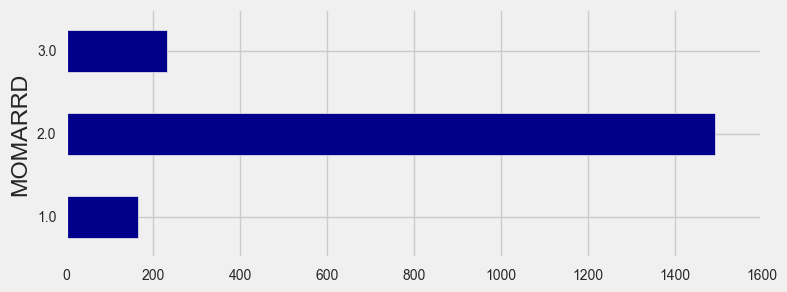

In [20]:
data_glimps('MOMARRD','darkblue','barh')

In [21]:
def get_bio_mom_marriage_dummy(x):
    if x==1:
        x=1
    elif x==3:
        x=np.nan
    else:
        x=0
    return x
    

df['MOMARRD']=df['MOMARRD'].apply(lambda x: get_bio_mom_marriage_dummy(x))

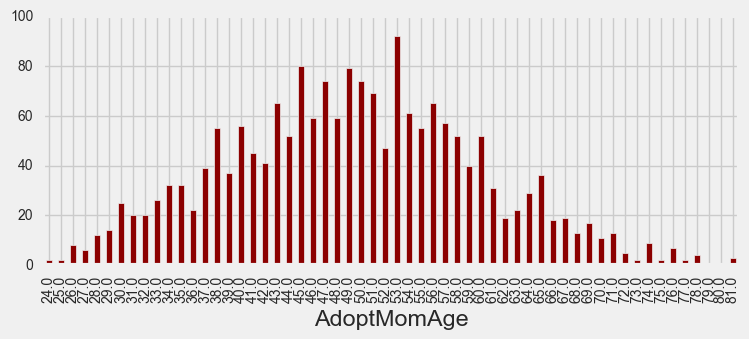

In [22]:
data_glimps('AdoptMomAge','darkred','bar')

In [23]:
ageam=df['AdoptMomAge']
df['std_adopt_mom_age']=(ageam-np.mean(ageam))/np.std(ageam)

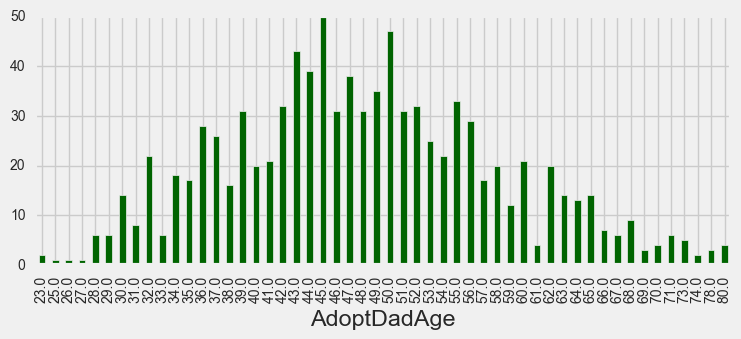

In [24]:
data_glimps('AdoptDadAge','darkgreen','bar')

In [25]:
agead=df['AdoptDadAge']
df['std_adopt_dad_age']=(agead-np.mean(agead))/np.std(agead)

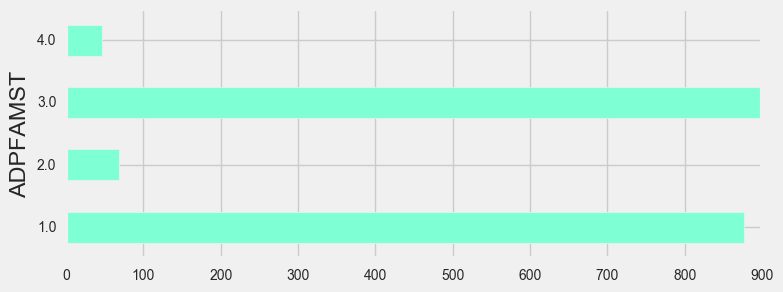

In [26]:
data_glimps('ADPFAMST','aquamarine','barh')

In [27]:
def get_couple_dummy(x):
    if x==1 or x==2:
        x=1
    
    else:
        x=0
    return x
    

df['if_couple']=df['ADPFAMST'].apply(lambda x: get_couple_dummy(x))

In [28]:
def single_female_dummy(x):
    if x==3 :
        x=1
    
    else:
        x=0
    return x
    

df['single_female']=df['ADPFAMST'].apply(lambda x: single_female_dummy(x))

In [29]:
def single_male_dummy(x):
    if x==4 :
        x=1
    
    else:
        x=0
    return x
    

df['single_male']=df['ADPFAMST'].apply(lambda x: single_male_dummy(x))

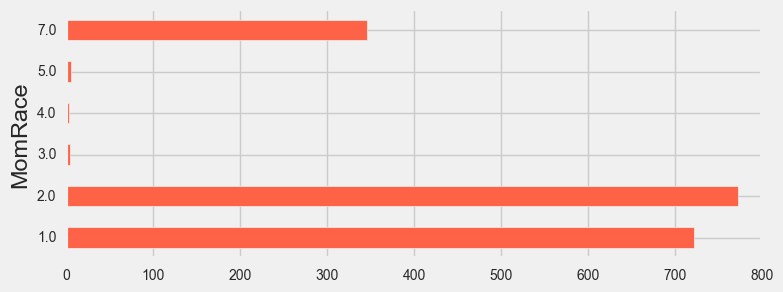

In [30]:
data_glimps('MomRace','tomato','barh')

In [31]:
df['mom_white']=df['MomRace'].apply(lambda x: get_white_dummy(x))
df['mom_black']=df['MomRace'].apply(lambda x: get_black_dummy(x))
df['mom_amid']=df['MomRace'].apply(lambda x: get_amid_dummy(x))
df['mom_asian']=df['MomRace'].apply(lambda x: get_asian_dummy(x))
df['mom_hawaii']=df['MomRace'].apply(lambda x: get_hawaii_dummy(x))
df['mom_mixed']=df['MomRace'].apply(lambda x: get_mixed_dummy(x))
df['mom_hispanic']=df['MomRace'].apply(lambda x: get_hispanic_dummy(x))

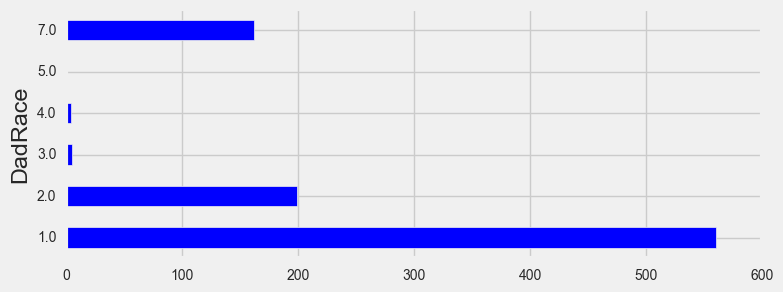

In [32]:
data_glimps('DadRace','blue','barh')

In [33]:
df['dad_white']=df['DadRace'].apply(lambda x: get_white_dummy(x))
df['dad_black']=df['DadRace'].apply(lambda x: get_black_dummy(x))
df['dad_amid']=df['DadRace'].apply(lambda x: get_amid_dummy(x))
df['dad_asian']=df['DadRace'].apply(lambda x: get_asian_dummy(x))
df['dad_hawaii']=df['DadRace'].apply(lambda x: get_hawaii_dummy(x))
df['dad_mixed']=df['DadRace'].apply(lambda x: get_mixed_dummy(x))
df['dad_hispanic']=df['DadRace'].apply(lambda x: get_hispanic_dummy(x))

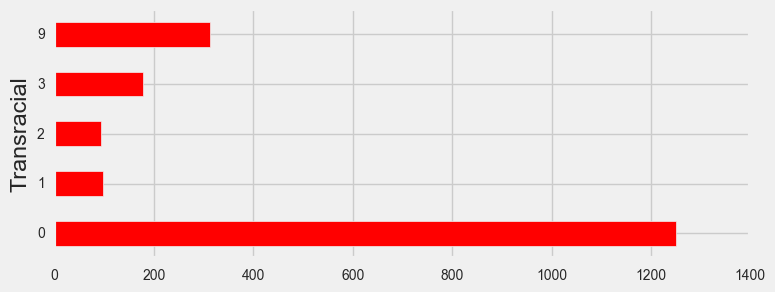

In [34]:
data_glimps('Transracial','red','barh')

In [35]:
def if_transracial_dummy(x):
    return np.nan if x==9 else 1 if x==1 or x== 2 or x ==3  else 0
df['transracial_dummy']=df['Transracial'].apply(lambda x: if_transracial_dummy(x))

In [36]:
df.describe().T

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
RECNUM,1933.0,2.465849e+11,5.383135e+10,1.011552e+10,2.521900e+11,2.611140e+11,2.618100e+11,2.626990e+11
SEX,1933.0,5.147439e-01,4.999119e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AGYSPNDS,1933.0,1.989653e+00,1.012169e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
AgeAtAdopt,1933.0,6.700466e+00,4.354240e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,2.000000e+01
ChildRace,1703.0,2.450969e+00,2.044404e+00,1.000000e+00,NaN,NaN,NaN,7.000000e+00
BioMomAgeAtBirth,1903.0,2.622176e+01,6.436882e+00,1.200000e+01,NaN,NaN,NaN,5.900000e+01
MOMARRD,1702.0,9.753231e-02,2.967684e-01,0.000000e+00,NaN,NaN,NaN,1.000000e+00
AdoptMomAge,1890.0,4.934709e+01,1.057095e+01,2.400000e+01,NaN,NaN,NaN,8.100000e+01
AdoptDadAge,946.0,4.806871e+01,1.024434e+01,2.300000e+01,NaN,NaN,NaN,8.000000e+01
ADPFAMST,1890.0,2.060317e+00,1.017352e+00,1.000000e+00,NaN,NaN,NaN,4.000000e+00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 43 columns):
RECNUM               1933 non-null int64
SEX                  1933 non-null int64
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
AdoptMomAge          1890 non-null float64
AdoptDadAge          946 non-null float64
ADPFAMST             1890 non-null float64
MomRace              1853 non-null float64
DadRace              931 non-null float64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic        

## If the age at adopt is related to other variables?


In [38]:
df_display=df[['SEX','AgeAtAdopt','BioMomAgeAtBirth','ADPFAMST','SN','if_couple','single_male','single_female']]

In [39]:
df_display.groupby('SEX').mean()

,AgeAtAdopt,BioMomAgeAtBirth,ADPFAMST,SN,if_couple,single_male,single_female
SEX,,,,,,,
0,6.639659,26.189189,2.103712,0.009595,0.463753,0.015991,0.496802
1,6.757789,26.252556,2.019507,0.011055,0.513568,0.032161,0.433166


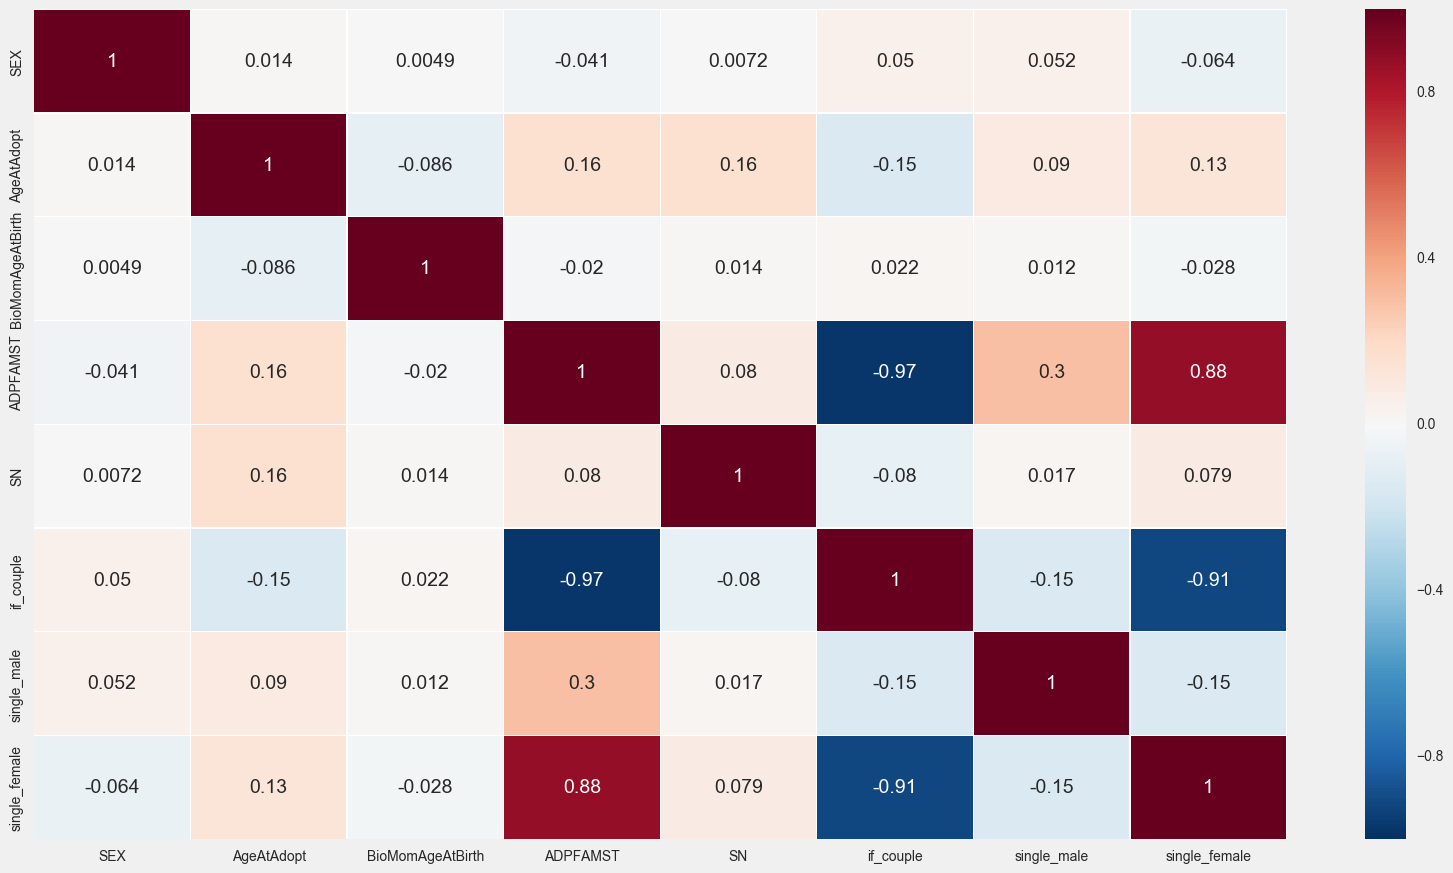

In [40]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df_display.corr(), annot=True, linewidths=.15, ax=ax)
plt.show()

In [41]:
df2=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [42]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

In [43]:
y, x = patsy.dmatrices("AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y = np.ravel(y)
print (y.shape)
print ("\n=====\n")
print (x.shape)

(1864,)

=====

(1864, 7)


In [44]:
from sklearn import linear_model

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(xtrain, ytrain)

In [46]:
print ("R^2: %.3f" % (model1.score(xtrain, ytrain)))
print ("Coefficients:", model1.coef_)
print ("Intercept: %.3f" % (model1.intercept_))

R^2: 0.052
('Coefficients:', array([ 0.00902821, -0.05280175, -0.69919008,  6.89450023, -2.35223224,
        2.16276865,  0.18946359]))
Intercept: 10.492


In [47]:
predictions = lm1.predict(xtest)
predictions.shape

(373,)

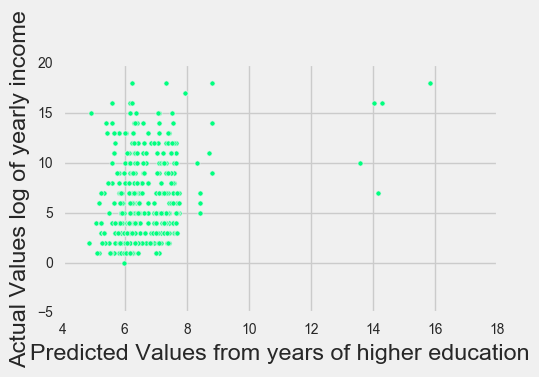

('MSE:', 15.528929384558625)


In [48]:
fig = plt.figure(figsize=(5,3))
plt.scatter(predictions, ytest, s=14, c='springgreen', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE:", mean_squared_error(ytest, predictions))

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 32 columns):
SEX                  1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
ADPFAMST             1890 non-null float64
SN                   1933 non-null int64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic             1933 non-null int64
if_couple            1933 non-null int64
single_female        1933 non-null int64
single_male          1933 non-null int64
mom_white            1933 non-null int64
mom_black            1933 non-null int64
mom_amid             1933 non-null int64
mom_asian            1933 non-null int64
mom_hawaii           193

In [50]:
lm_stats= smf.ols(formula='AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female+white+black+amid+asian+hawaii+mixed+hispanic+mom_white+mom_black+mom_amid+mom_asian+mom_hawaii+mom_mixed+mom_hispanic+dad_white+dad_black+dad_amid+dad_asian+dad_hawaii+dad_mixed+dad_hispanic+transracial_dummy', data=df2).fit()
print (lm_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             AgeAtAdopt   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6.217
Date:                Mon, 01 May 2017   Prob (F-statistic):           2.41e-18
Time:                        17:17:42   Log-Likelihood:                -4542.8
No. Observations:                1597   AIC:                             9134.
Df Residuals:                    1573   BIC:                             9263.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             5.6814      1.58

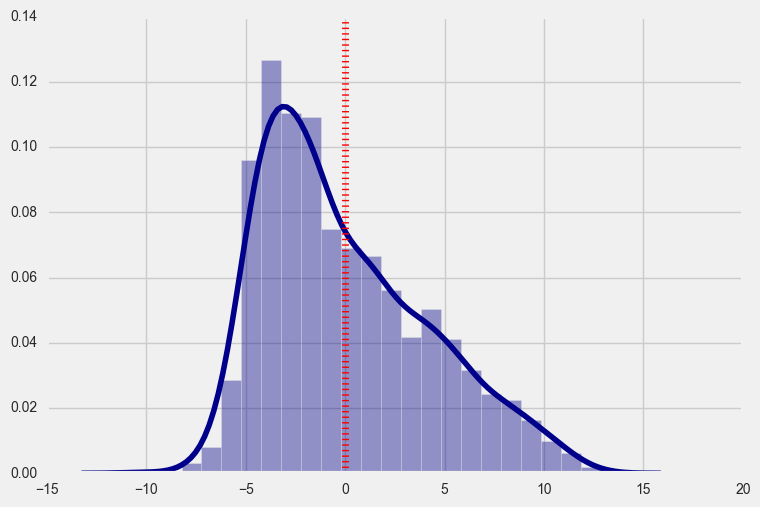

In [51]:
np.mean(lm_stats.resid)
sns.distplot(lm_stats.resid, color='darkblue')
plt.axvline(np.mean(lm_stats.resid), color='red', linestyle='dotted', linewidth=5)
plt.show()

In [52]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [53]:
ridge_alphas=np.logspace(0,5,200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(xtrain, ytrain)

print optimal_ridge.alpha_

1.68318035333


In [54]:
from sklearn.cross_validation import cross_val_score

In [55]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, xtrain, ytrain, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[ 0.0196738  -0.01095642  0.0323772   0.01888875  0.05043592  0.03230725
 -0.00631467  0.08271647  0.04319565  0.04714485]
0.0309468797684


In [56]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xtrain, ytrain)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00797217209082


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [57]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, xtrain, ytrain, cv=10)

print (lasso_scores)

[ 0.01935277 -0.01086427  0.04059628  0.01735474  0.04926843  0.03245724
  0.00715795  0.08077734  0.04078367  0.04345707]


In [58]:
lasso.fit(xtrain, ytrain)


Lasso(alpha=0.0079721720908200039, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso_coefs = pd.DataFrame({'variable':x.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
3,5.898164,5.898164,SN
4,1.183835,-1.183835,if_couple
5,0.922521,0.922521,single_male
1,0.052510,-0.052510,BioMomAgeAtBirth
0,0.000000,0.000000,SEX
2,0.000000,0.000000,ADPFAMST
6,0.000000,-0.000000,single_female


In [60]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(xtrain, ytrain)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0080597568774
1.0


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.6s finished


In [61]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, xtrain, ytrain, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.01933081 -0.01083361  0.04066028  0.01728983  0.04924609  0.0324766
  0.00731964  0.08069764  0.04069444  0.04347098]
0.0320352715932


In [62]:
ridge.fit(xtrain, ytrain)
enet.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.0079721720908200039, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
ridge_resid = ytest - ridge.predict(xtest)
lasso_resid = ytest - lasso.predict(xtest)
enet_resid = ytest - enet.predict(xtest)

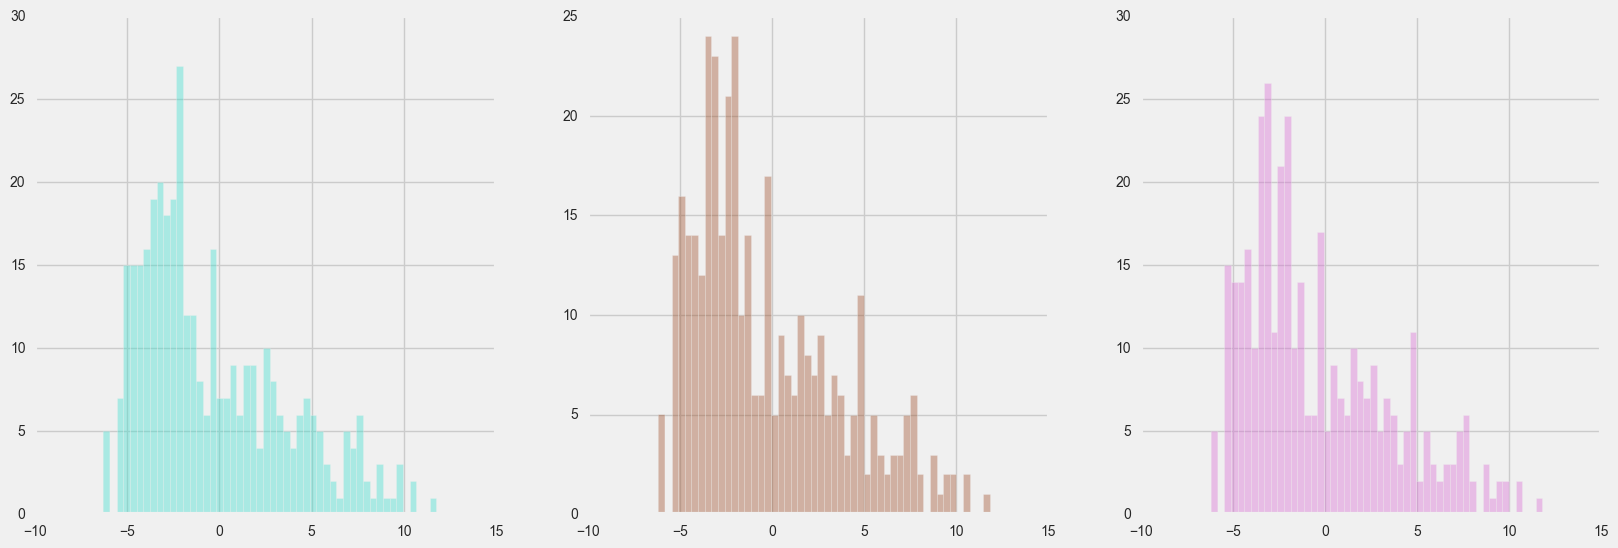

In [64]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='orchid', ax=axarr[2], label='ElasticNet residuals')

plt.show()

In [65]:
lm_sk = linear_model.LinearRegression()
model_sk = cross_val_score(lm_sk, xtrain, ytrain, cv=10)

In [66]:
print ytrain.mean()

6.70422535211


In [67]:
print (model_sk)

[ 0.01787519 -0.01072621  0.02771009  0.01955358  0.05215089  0.03295721
 -0.01240705  0.08856462  0.04807898  0.03877164]


## prediction on sex of children adopted

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
df_sex=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [70]:
df_sex.head()


,SEX,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,ADPFAMST,SN,white,black,amid,...,mom_mixed,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy
0,0,0,1.0,20.0,1.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
1,1,1,2.0,29.0,0.0,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1.0
2,0,0,1.0,24.0,0.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
3,0,0,NaN,28.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
4,1,1,NaN,36.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN


In [71]:
lgm=linear_model.LogisticRegression()


In [72]:
y1, x1 = patsy.dmatrices("SEX ~ AgeAtAdopt+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y1 = np.ravel(y1)


In [73]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.10)

In [74]:
model = cross_val_score(lgm,x1train, y1train, cv=10)

In [75]:
print y1train.mean()
print model

0.516994633274
[ 0.5297619   0.52380952  0.45833333  0.54166667  0.5297619   0.51190476
  0.51190476  0.53293413  0.50299401  0.56287425]


In [76]:
Cs = np.logspace(0.0, 5.0, 20)

In [77]:
search_parameters = {"penalty": ['l1','l2'],"C": Cs,  "fit_intercept": [False, True], "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']}



In [78]:
from sklearn.grid_search import GridSearchCV

In [79]:
estimator = GridSearchCV(lgm, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [80]:
estimator.fit(x1train, y1train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   14.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [81]:
lgm_best = estimator.best_estimator_

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
y1predict=estimator.predict(x1test)

confmat = confusion_matrix(y_true=y1test, y_pred=y1predict)
confmat

array([[50, 44],
       [47, 46]])

In [84]:
confusion = pd.DataFrame(confmat, index=['True_Male', 'True_Female'],
                         columns=['Predict_Male', 'Predict_Female'])

confusion

,Predict_Male,Predict_Female
True_Male,50,44
True_Female,47,46


## Random forest


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 43 columns):
RECNUM               1933 non-null int64
SEX                  1933 non-null int64
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
AdoptMomAge          1890 non-null float64
AdoptDadAge          946 non-null float64
ADPFAMST             1890 non-null float64
MomRace              1853 non-null float64
DadRace              931 non-null float64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic        

In [86]:
dfrf=df.drop(['RECNUM','Transracial','ChildRace','MomRace','DadRace','std_adopt_dad_age','AdoptDadAge'],axis=1)

In [87]:
dfrf.isnull().sum()
dfrf=dfrf.dropna(how='any')

In [88]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )
params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [89]:
ys= dfrf['SEX']
columns=dfrf.columns.tolist()
xs=dfrf[[i for i in columns]]
xs=xs.drop(['SEX'],axis=1)

In [90]:
print ys.shape,
xs.shape

(1419,)

(1419, 35)

In [91]:
dfrf.isnull().sum()

SEX                  0
AGYSPNDS             0
AgeAtAdopt           0
BioMomAgeAtBirth     0
MOMARRD              0
AdoptMomAge          0
ADPFAMST             0
SN                   0
std_age_at_adopt     0
white                0
black                0
amid                 0
asian                0
hawaii               0
mixed                0
hispanic             0
std_bio_mom_age      0
std_adopt_mom_age    0
if_couple            0
single_female        0
single_male          0
mom_white            0
mom_black            0
mom_amid             0
mom_asian            0
mom_hawaii           0
mom_mixed            0
mom_hispanic         0
dad_white            0
dad_black            0
dad_amid             0
dad_asian            0
dad_hawaii           0
dad_mixed            0
dad_hispanic         0
transracial_dummy    0
dtype: int64

In [92]:
def drop_99(x):
    if x==99:
        x=np.nan
    
    else:
        x=x
    return x
    

df['ChildRace']=df['ChildRace'].apply(lambda x: drop_99(x))
df['MomRace']=df['MomRace'].apply(lambda x: drop_99(x))
df['DadRace']=df['DadRace'].apply(lambda x: drop_99(x))

In [93]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.2)

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [95]:
estimator_rfr.fit(xs_train, ys_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [96]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=2, max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 4}


best score -0.0101758422831


In [97]:
y_pred_rfdtr= rfr_best.predict(xs_test)
y_pred_rfdtr

array([ 0.51512195,  0.50873483,  0.52097001,  0.54489405,  0.52208029,
        0.56427117,  0.56005415,  0.50834733,  0.51982208,  0.52112447,
        0.49914924,  0.52909846,  0.52722774,  0.50950964,  0.51293735,
        0.49749314,  0.52668229,  0.50952148,  0.50014904,  0.51924423,
        0.50305423,  0.52597558,  0.50310578,  0.54593071,  0.5067871 ,
        0.5517489 ,  0.53332229,  0.51204394,  0.51774445,  0.52382297,
        0.49266127,  0.54395076,  0.52621626,  0.52177918,  0.51096861,
        0.52783328,  0.51667105,  0.54431037,  0.52948841,  0.55845497,
        0.52735954,  0.49687406,  0.53108591,  0.51033622,  0.50521952,
        0.50196353,  0.5217967 ,  0.51343818,  0.50930965,  0.50309223,
        0.51595422,  0.52709335,  0.5157351 ,  0.49955895,  0.49875629,
        0.52052436,  0.48272824,  0.52948539,  0.49463639,  0.51491493,
        0.52571973,  0.52096221,  0.53524611,  0.48015917,  0.535235  ,
        0.51837541,  0.50550552,  0.5105503 ,  0.49610692,  0.51

In [98]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model): 
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [99]:
rsquare_meansquare_error(ys_train, ys_test, xs_train, xs_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.25, test data: 0.25
R^2 Random Forest Regression tree train data: 0.02, test data: 0.00


## Regression tree on children race

In [100]:
dfrf2=df.drop(['white','black','amid','asian','hawaii','mixed','hispanic','RECNUM','Transracial','MomRace','DadRace','std_adopt_dad_age','AdoptDadAge'],axis=1)
dfrf2=dfrf2.dropna(how='any')
yr= dfrf2['ChildRace']
columns=dfrf2.columns.tolist()
xr=dfrf2[[i for i in columns]]
xr=xr.drop(['SEX','ChildRace'],axis=1)


In [101]:
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.2)

In [102]:
estimator_rfr.fit(xr_train, yr_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [103]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 4}


best score 0.382802320901


In [104]:
yr_pred_rfdtr= rfr_best.predict(xr_test)
yr_pred_rfdtr

array([ 3.60883422,  3.55099261,  1.75276966,  2.36556624,  2.31407583,
        2.3086399 ,  2.28850037,  2.92337122,  2.73845746,  2.46361878,
        4.19029072,  1.51357852,  3.17309246,  1.84045226,  1.81322298,
        2.34498321,  3.06573373,  2.3164874 ,  2.0158819 ,  2.29824157,
        3.25622954,  1.49001742,  3.42724954,  2.27941577,  1.84987236,
        2.50310149,  2.4059083 ,  1.54872519,  1.72198717,  4.17113484,
        2.45996041,  2.42268361,  1.48714905,  1.49936447,  3.2956021 ,
        3.91732844,  2.41936524,  2.28415752,  2.44970144,  1.47312461,
        1.49095919,  1.46845079,  3.17258502,  2.4919781 ,  1.50242102,
        2.41531301,  1.46379433,  2.45581948,  3.45805824,  2.36678112,
        1.54823739,  1.47503745,  2.47978473,  3.75872498,  1.84185514,
        2.04571665,  1.48489909,  2.3357687 ,  2.45964427,  3.7148672 ,
        3.32745103,  2.94703389,  2.20038842,  2.26940134,  2.15030068,
        1.52405234,  1.77948424,  1.50190546,  2.77531538,  3.97

In [105]:
rsquare_meansquare_error(yr_train, yr_test, xr_train, xr_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 2.36, test data: 2.62
R^2 Random Forest Regression tree train data: 0.38, test data: 0.33


## K-means on Children's race

In [106]:
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets



In [107]:
dfkn=df

In [108]:
def get_race(x):
    return 'White' if x==1 else 'Black' if x==2 else 'Amind' if x==3 else "Asian" if x==4 else 'Hawaii' if x==5 else  'More than one'  if x==6 else 'Hispanice'
dfkn['ChildRace_Name']=dfkn['ChildRace'].apply(lambda x: get_race(x))

In [109]:
dfkn.head()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy,ChildRace_Name
0,10115515140,0,2,0,1.0,20.0,1.0,33.0,33.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
1,10185923110,1,2,1,2.0,29.0,0.0,45.0,54.0,1.0,...,0,1,0,0,0,0,0,0,1.0,Black
2,10199738080,0,2,0,1.0,24.0,0.0,36.0,45.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
3,10206906020,0,2,0,NaN,28.0,0.0,41.0,44.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice
4,10286352150,1,2,1,NaN,36.0,0.0,32.0,32.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice


In [110]:
dfkn=dfkn.dropna(how='any')

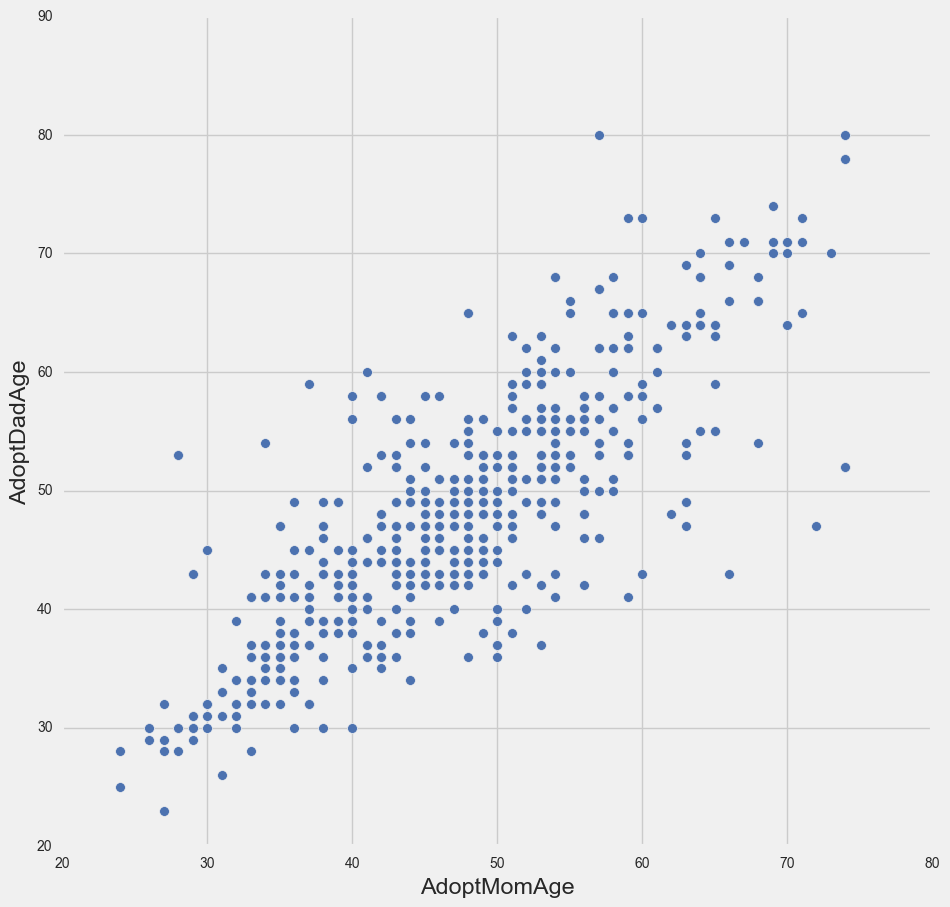

In [111]:
dfkn.plot(kind="scatter", x='AdoptMomAge', y='AdoptDadAge', figsize=(10,10), s = 50)
plt.show()

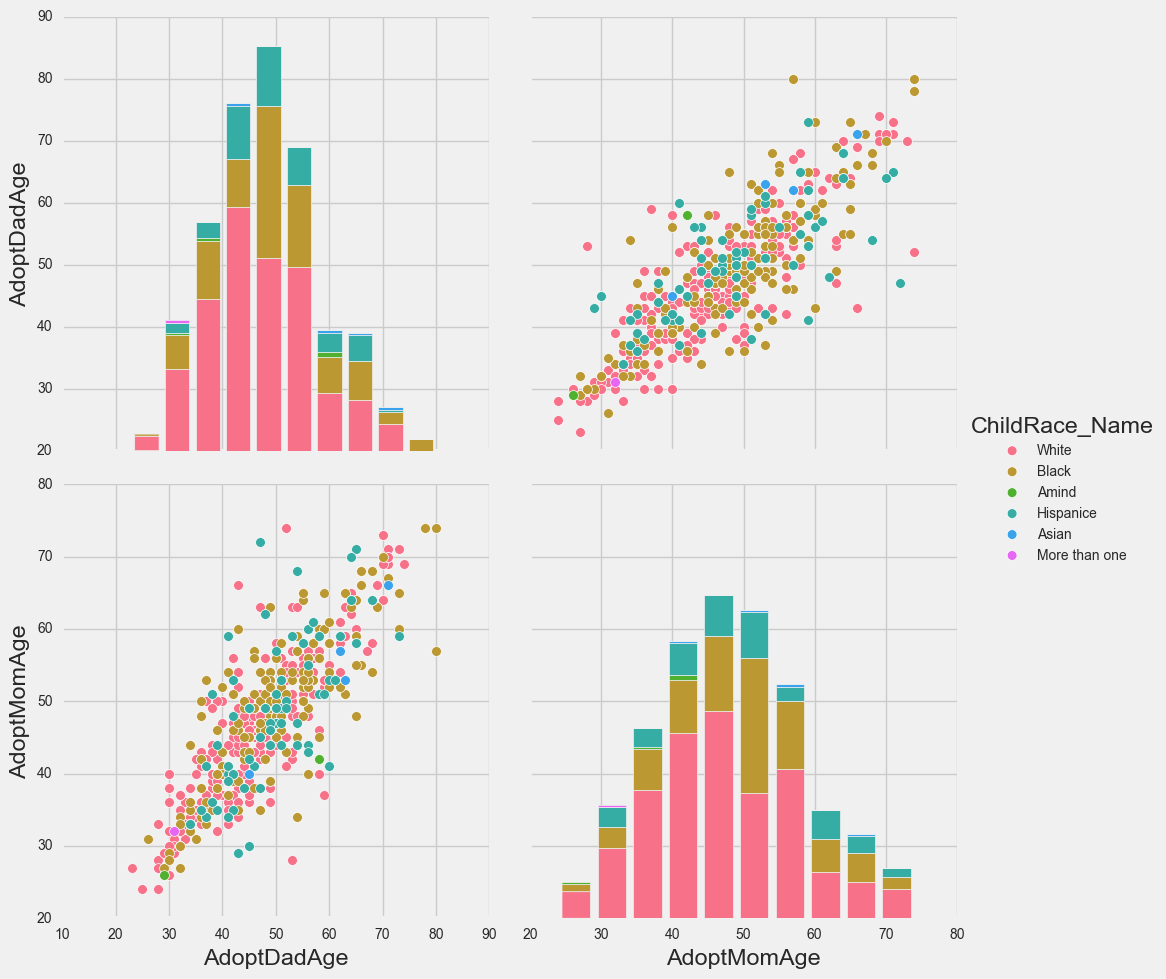

In [112]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["AdoptDadAge", "AdoptMomAge"])
plt.show()

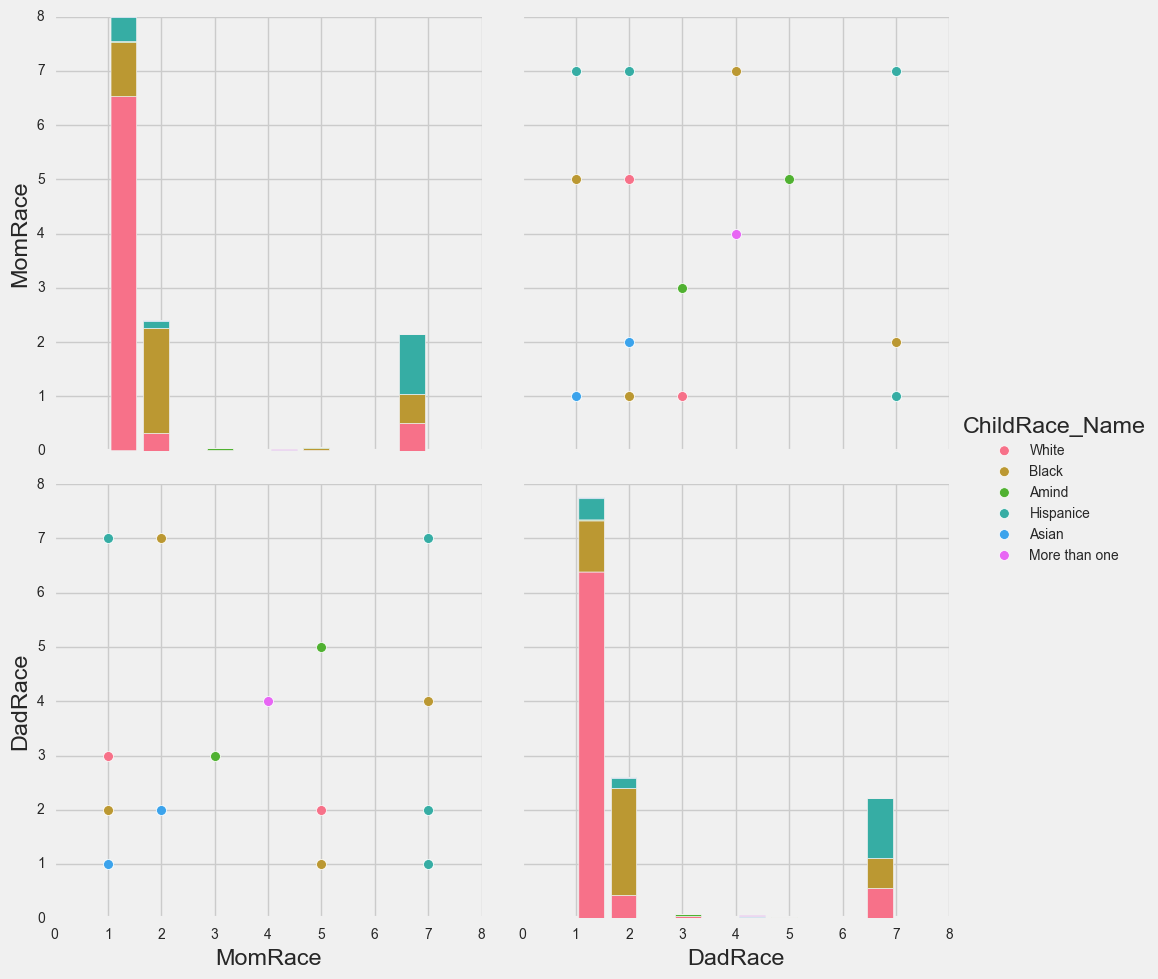

In [113]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["MomRace", "DadRace"])
plt.show()

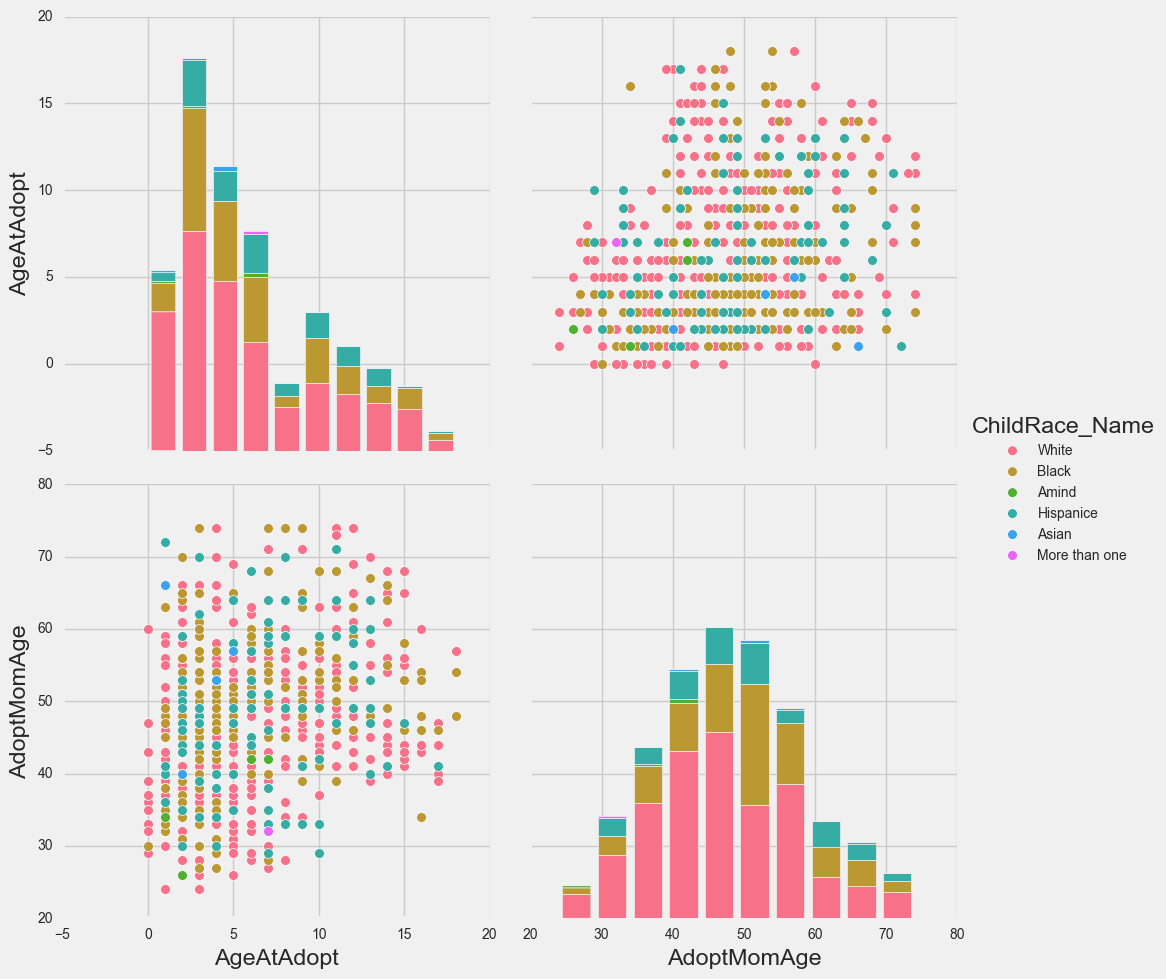

In [114]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["AgeAtAdopt", "AdoptMomAge"])
plt.show()

In [115]:
import random

In [116]:
def get_shack(x):
    h=random.uniform(-0.4,0.4)
    x=x+h
    return x
dfkn_display=dfkn
dfkn_display['MomRace']=dfkn_display['MomRace'].apply(lambda x : get_shack(x))
dfkn_display['DadRace']=dfkn_display['DadRace'].apply(lambda x : get_shack(x))


/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


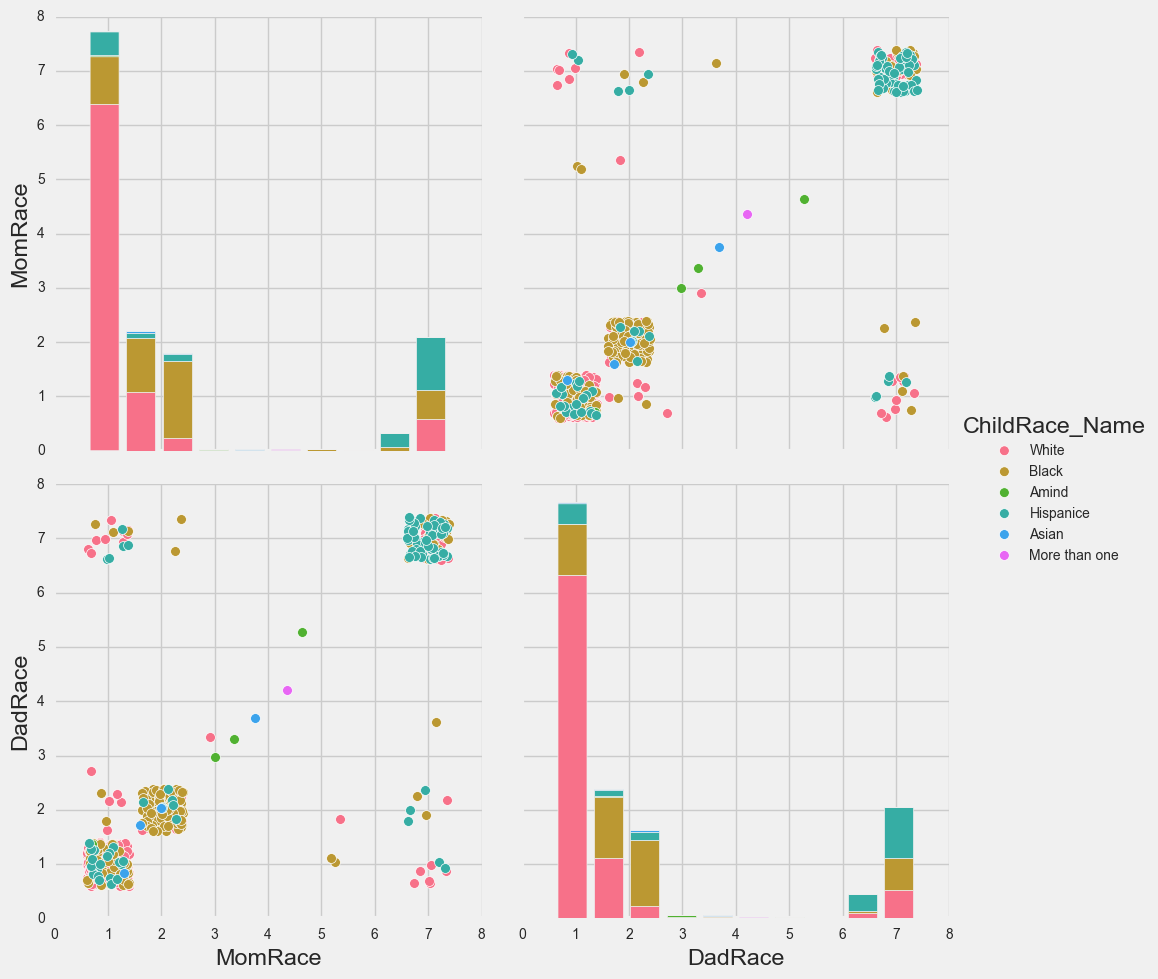

In [117]:
sns.pairplot(dfkn_display, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["MomRace", "DadRace"])
plt.show()

In [118]:
dfkn_apply=df[['ChildRace','MomRace','DadRace','AgeAtAdopt','AdoptMomAge','AdoptDadAge']]

In [127]:
dfkn_display.groupby('ChildRace').mean()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,...,mom_mixed,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy
ChildRace,,,,,,,,,,,,,,,,,,,,,
1.0,2.300563e+11,0.550481,2.000000,5.764423,25.774038,0.213942,46.536058,46.877404,1.040865,1.471558,...,0.0,0.069712,0.862981,0.057692,0.004808,0.000000,0.00,0.0,0.074519,0.103365
2.0,2.478766e+11,0.522843,2.000000,6.157360,27.406091,0.050761,49.492386,50.248731,1.106599,2.546756,...,0.0,0.152284,0.269036,0.563452,0.000000,0.005076,0.00,0.0,0.162437,0.426396
3.0,1.992372e+11,0.500000,2.000000,4.000000,23.750000,0.000000,36.000000,45.500000,1.000000,2.926031,...,0.0,0.000000,0.250000,0.000000,0.500000,0.000000,0.25,0.0,0.000000,0.500000
4.0,1.990840e+11,0.250000,2.000000,3.000000,30.500000,0.000000,54.000000,60.250000,1.000000,2.164876,...,0.0,0.000000,0.250000,0.500000,0.000000,0.250000,0.00,0.0,0.000000,0.750000
6.0,2.624120e+11,1.000000,2.000000,7.000000,22.000000,0.000000,32.000000,31.000000,1.000000,4.353604,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.0,0.000000,1.000000
7.0,2.568688e+11,0.606383,1.978723,6.797872,28.042553,0.159574,48.861702,50.180851,1.063830,4.995993,...,0.0,0.659574,0.234043,0.106383,0.000000,0.000000,0.00,0.0,0.659574,0.287234


In [120]:
dfkn_display=dfkn_display.dropna(how='any')

In [121]:
k = 7
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dfkn_display)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [122]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print "Labels:", labels
print ""
print "Centroids:", centroids

Labels: [2 6 4 1 6 4 6 2 4 6 1 3 3 6 4 2 2 6 2 6 2 2 3 4 4 6 3 2 2 4 5 2 4 2 6 2 4
 4 2 2 4 4 2 6 6 6 4 4 6 4 6 4 2 2 6 3 6 3 6 6 6 6 3 1 0 0 0 0 1 0 0 1 3 3
 0 0 1 0 0 3 0 0 1 5 5 0 0 0 0 1 0 1 0 3 4 0 0 5 0 1 1 0 0 3 0 3 5 0 1 0 3
 0 0 1 1 5 1 0 0 0 5 2 5 3 0 3 1 3 4 3 2 3 0 0 1 5 3 3 3 3 0 1 3 0 0 0 3 3
 2 0 2 4 2 4 1 0 1 3 3 0 0 0 0 3 3 3 3 3 3 1 1 3 3 1 6 5 0 4 1 5 0 6 3 3 3
 3 0 6 1 0 0 3 0 3 0 3 1 0 0 6 3 6 3 2 4 6 3 0 4 4 2 3 6 2 1 3 2 4 3 3 3 0
 3 0 0 3 5 0 0 0 0 0 0 1 1 0 0 0 1 3 3 0 0 1 3 0 3 3 1 3 6 3 4 3 5 4 4 4 4
 0 6 3 2 1 3 1 4 4 3 1 1 6 4 4 0 6 1 4 6 3 1 1 4 4 0 0 0 6 3 6 1 4 1 6 6 0
 0 2 2 4 3 0 1 0 0 2 3 6 2 1 6 6 3 3 4 6 4 5 1 3 3 2 4 6 2 3 6 4 0 6 4 2 2
 3 6 0 0 6 3 3 1 1 6 4 4 3 1 1 3 6 2 1 6 6 4 4 1 1 1 4 6 3 6 5 5 5 5 6 3 4
 1 1 2 4 4 4 2 6 6 6 1 4 6 3 3 1 6 3 6 4 4 5 4 2 6 3 6 6 5 1 6 4 3 2 4 6 2
 4 4 6 1 1 6 4 6 1 3 3 3 6 4 2 1 6 6 6 6 0 6 2 3 6 6 4 2 6 3 2 0 6 6 4 4 6
 4 6 2 4 6 4 6 6 6 1 6 6 3 4 3 2 0 6 4 5 4 6 0 0 0 4 1 1 3 3 3 3 6 3 3 3 1
 4 6 4 1 5 3 4 6 

In [123]:
metrics.silhouette_score(dfkn_display, labels, metric='euclidean')

0.22985847281849181

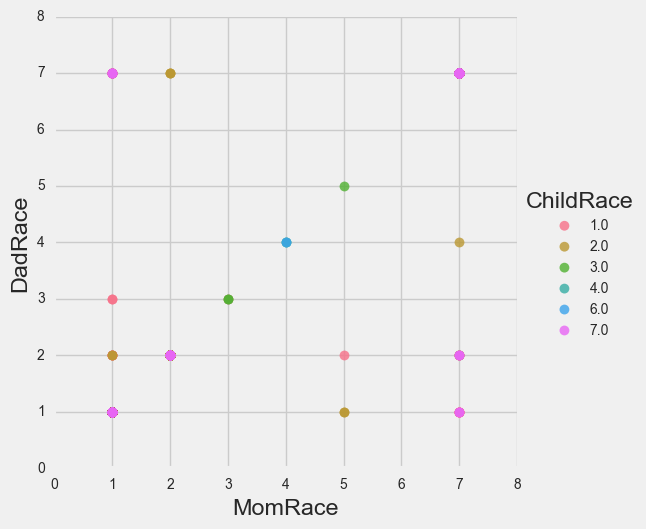

In [124]:
dfkn_display['ChildRace'] = labels
sns.lmplot(
    x = 'MomRace',
    y = 'DadRace',
    hue = 'ChildRace',
    data = df,
    size = 5.5,
    scatter_kws={"s": 50},
    fit_reg=False);
plt.show()

In [129]:
from sklearn.cluster import KMeans
k_range = range(2,10)
sil_list = []
WCSS_list = []
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dfkn_apply)
    
    cluster_labels = kmeans.labels_
    
    sil_score = metrics.silhouette_score(dfkn_apply, cluster_labels)
    sil_list.append(sil_score)
    
    wcss = kmeans.inertia_
    WCSS_list.append(wcss)
plt.show()

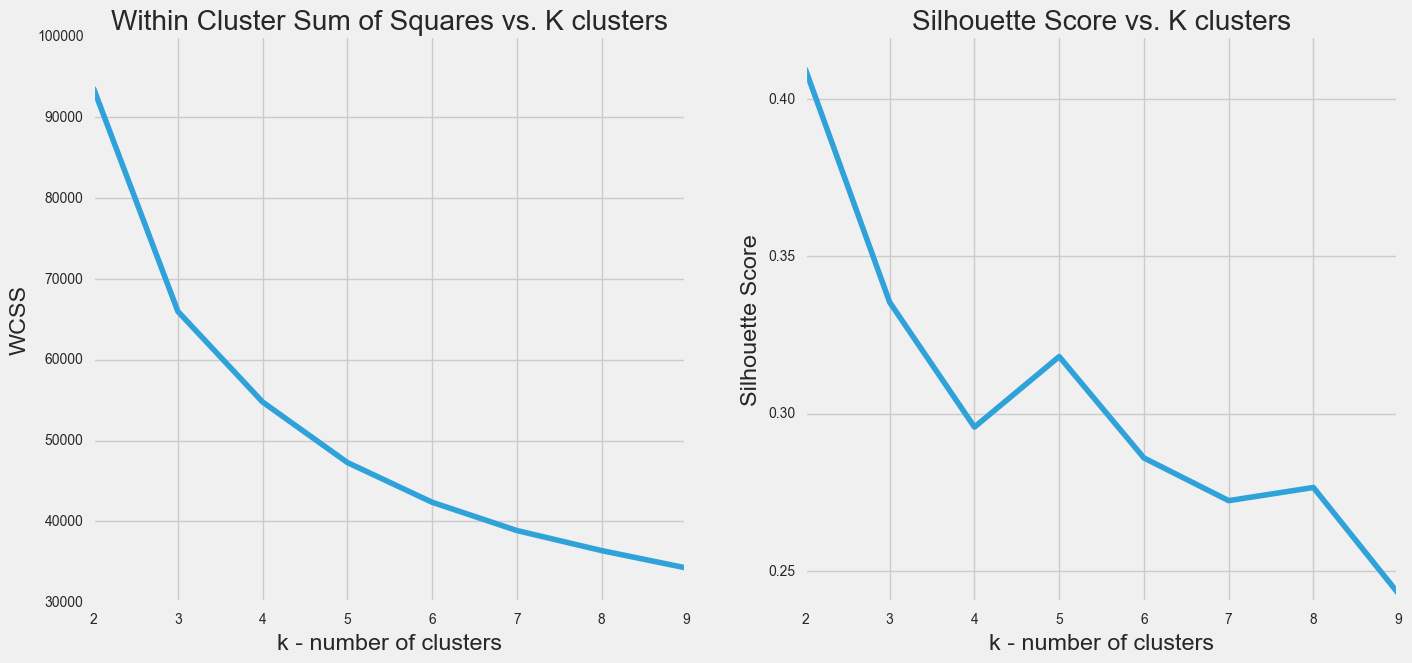

In [126]:
fig = plt.figure(figsize = (15,15))
fig.add_subplot(221)
plt.plot(k_range, WCSS_list)
plt.title("Within Cluster Sum of Squares vs. K clusters");
plt.ylabel("WCSS")
plt.xticks(k_range)
plt.xlabel("k - number of clusters");

fig.add_subplot(222)
plt.plot(k_range, sil_list)
plt.xticks(k_range)
plt.title("Silhouette Score vs. K clusters");
plt.ylabel("Silhouette Score")
plt.xlabel("k - number of clusters");
plt.show()